In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [175]:
companies = pd.read_csv('1000_Companies.csv')


In [176]:
companies.head(6)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12


In [177]:
x = companies.iloc[:,:-1]
y = companies.iloc[:,-1]

<Axes: >

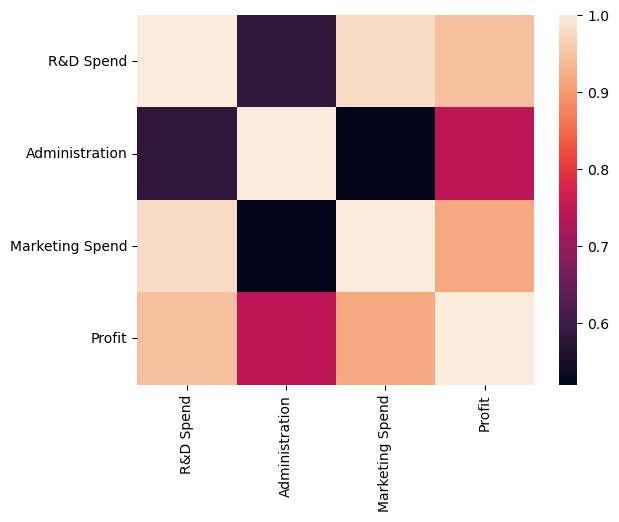

In [178]:
heat = companies.iloc[:,[0,1,2,4]]
sns.heatmap(heat.corr())

In [179]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


In [180]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [181]:
labelencoder = LabelEncoder()
x.iloc[:, 3] = labelencoder.fit_transform(x.iloc[:,3])


In [182]:
print(x)

     R&D Spend  Administration  Marketing Spend State
0    165349.20      136897.800      471784.1000     2
1    162597.70      151377.590      443898.5300     0
2    153441.51      101145.550      407934.5400     1
3    144372.41      118671.850      383199.6200     2
4    142107.34       91391.770      366168.4200     1
..         ...             ...              ...   ...
995   54135.00      118451.999      173232.6695     0
996  134970.00      130390.080      329204.0228     0
997  100275.47      241926.310      227142.8200     0
998  128456.23      321652.140      281692.3200     0
999  161181.72      270939.860      295442.1700     2

[1000 rows x 4 columns]


In [183]:
from sklearn.compose import ColumnTransformer

In [184]:
 transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [3])],remainder='passthrough')

In [185]:
x = transformer.fit_transform(x)

In [186]:
print(x)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0027547e+05 2.4192631e+05
  2.2714282e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2845623e+05 3.2165214e+05
  2.8169232e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6118172e+05 2.7093986e+05
  2.9544217e+05]]


In [187]:
x = x[:,1:]

In [188]:
print(x[0])

[0.000000e+00 1.000000e+00 1.653492e+05 1.368978e+05 4.717841e+05]


In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [190]:
print(y_train)

687     81824.87341
500    156340.43820
332    135591.40940
979     60065.21791
817    142927.20940
           ...     
835    143338.97790
192     94376.97653
629     68575.66854
559    106070.51680
684    144805.79620
Name: Profit, Length: 800, dtype: float64


In [191]:
print(X_train)

[[0.00000000e+00 0.00000000e+00 3.83850000e+04 1.16125967e+05
  1.42843002e+05]
 [1.00000000e+00 0.00000000e+00 1.25610000e+05 1.29007753e+05
  3.11143877e+05]
 [0.00000000e+00 0.00000000e+00 1.01322000e+05 1.25420790e+05
  2.64280115e+05]
 ...
 [0.00000000e+00 0.00000000e+00 2.28760000e+04 1.13835527e+05
  1.12918344e+05]
 [0.00000000e+00 0.00000000e+00 6.67660000e+04 1.20317403e+05
  1.97604218e+05]
 [0.00000000e+00 0.00000000e+00 1.12108000e+05 1.27013716e+05
  2.85091731e+05]]


In [192]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [193]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532915,  88427.0718736 ,  94894.67836971, 175680.86725612,
        83411.73042088, 110571.90200074, 132145.22936441,  91473.37719686,
       164597.05380607,  53222.826674  ,  66950.19050988, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053063,  75316.2814305 ,
       118248.14406603, 164574.40699903, 170937.2898107 , 182069.11645086,
       118845.03252688,  85669.95112228, 180992.59396145,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.07669089,  56881.41475223,
        68896.39346904, 210040.00765885, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996742, 108857.91214126,
       186014.72531989, 171442.64130748, 174644.26529206, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.48986819, 158416.46827611,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924518, 174609.08266881,
        93745.66352058,  

In [194]:
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [195]:
print(regressor.intercept_)

-51035.22972405041


In [196]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9112695892268861

<function matplotlib.pyplot.show(close=None, block=None)>

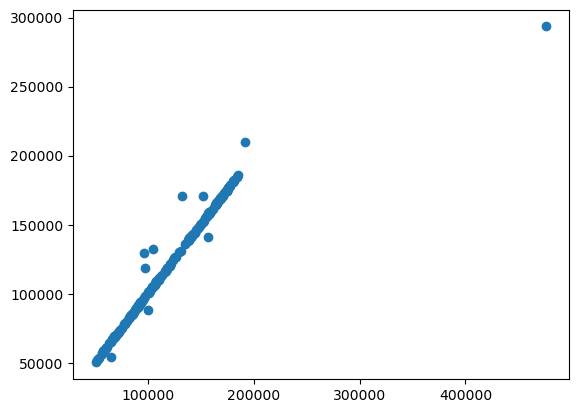

In [197]:
plt.scatter(y_test,y_pred,marker= 'o')
plt.show

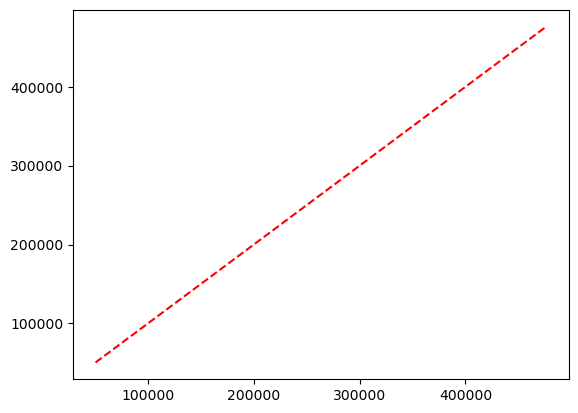

In [198]:
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

In [199]:
import pickle

# Save the trained model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!
